### Time Series Analysis : Visualization with Seaborn

In [3]:
import pandas as pd
import math
import numpy as np
import calendar
import seaborn as sns
import itertools
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline  
import warnings
warnings.filterwarnings("ignore")
plt.style.use('ggplot')

In [4]:
passenger_data = pd.read_csv('AirPassengers.csv')
passenger_data.Month = pd.to_datetime(passenger_data.Month, 
                                      infer_datetime_format=True)
passenger_data['year'] = passenger_data.Month.dt.year
passenger_data['month'] = passenger_data.Month.dt.month

#### 1. Line plots

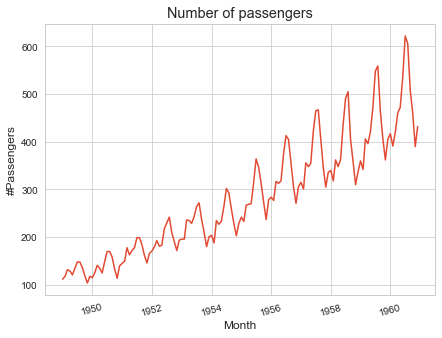

In [5]:
# Line plot
plt.figure(figsize=(7, 5))
sns.set_style("whitegrid")
sns.lineplot(x="Month", y="#Passengers", data=passenger_data)
plt.xticks(rotation=15)
plt.title('Number of passengers')
plt.show()

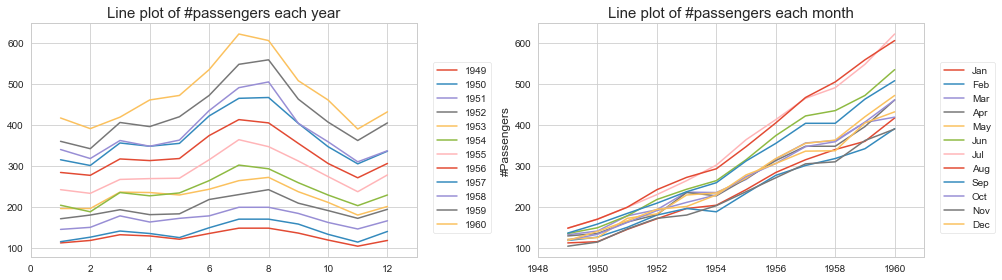

In [70]:
plt.figure(figsize=(14, 4))          
# Histogram for each year
plt.subplot(1, 2, 1)  
grouped = passenger_data.groupby('year')
for name, group in grouped:
     sns.lineplot(x=range(1,13), y=group['#Passengers'].values, label=name)
plt.legend(loc=(1.04, 0.1))
plt.xlim(0, 13)
plt.title('Line plot of #passengers each year', fontsize=15)

plt.subplot(1, 2, 2)           
# Histogram for each month
grouped = passenger_data.groupby('month')
month = list(calendar.month_abbr)[1:]
for name, group in grouped:
     sns.lineplot(x=range(1949, 1961), y=group['#Passengers'], label=month[name-1])
plt.legend(loc=(1.04, 0.1))
plt.xlim(1948, 1961)
plt.title('Line plot of #passengers each month', fontsize=15)
plt.tight_layout()
plt.show()

#### 2. Histograms and Density Plots

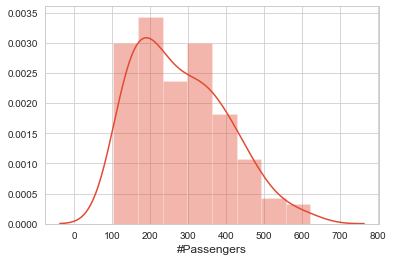

In [20]:
sns.distplot(passenger_data['#Passengers'])
plt.show()

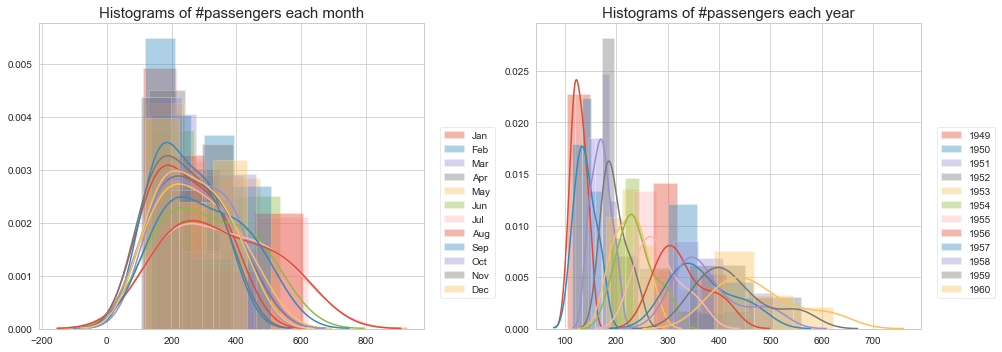

In [29]:
plt.figure(figsize=(14, 5))          
# Histogram for each year
plt.subplot(1, 2, 1)  
grouped = passenger_data.groupby('year')
for name, group in grouped:
     sns.distplot(group['#Passengers'].values, label=name)
plt.legend(loc=(1.04, 0.1))
plt.title('Histograms of #passengers each year', fontsize=15)

plt.subplot(1, 2, 2)           
# Histogram for each month
grouped = passenger_data.groupby('month')
month = list(calendar.month_abbr)[1:]
for name, group in grouped:
     sns.distplot(group['#Passengers'].values, label=month[name-1])
plt.legend(loc=(1.04, 0.1))
plt.title('Histograms of #passengers each month', fontsize=15)
plt.tight_layout()
plt.show()

Or you can plot then on different plots without overlapping:

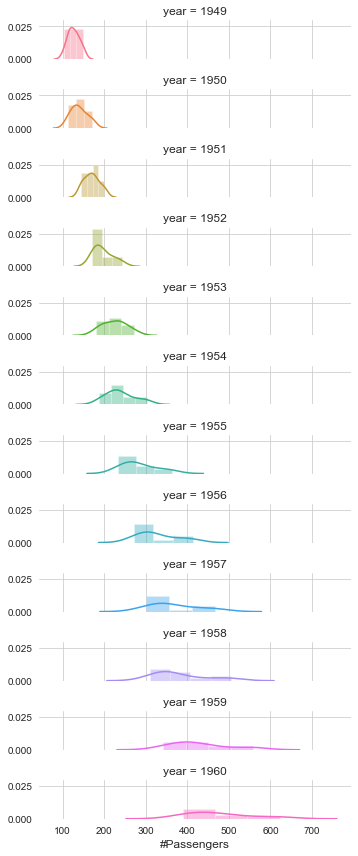

In [117]:
# Initialize the FacetGrid object
g_1 = sns.FacetGrid(passenger_data, row="year", 
                    hue="year", aspect=5, height=1)
# Draw the densities in a few steps
g_1.map(sns.distplot, "#Passengers")
g_1.fig.subplots_adjust(hspace=-.05)
g_1.despine(bottom=True, left=True)
plt.tight_layout()
plt.show()

#### 3. Box plots

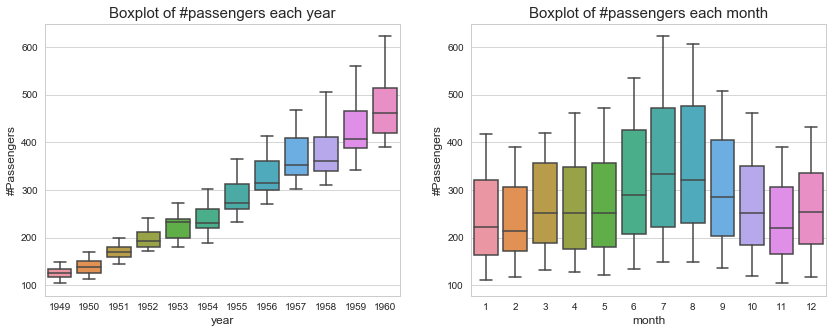

In [35]:
plt.figure(figsize=(14, 5))          
# Boxplot for each year
plt.subplot(1, 2, 1)  
sns.boxplot(y=passenger_data['#Passengers'], x=passenger_data['year'] )
plt.title('Boxplot of #passengers each year', fontsize=15)
# Boxplot for each month
plt.subplot(1, 2, 2)
sns.boxplot(y=passenger_data['#Passengers'], x=passenger_data['month'] )
plt.title('Boxplot of #passengers each month', fontsize=15)
plt.show()

#### 4. Heatmap

In [44]:
# We need to create a pivot table to use heatmap
pivot_table = passenger_data.pivot("month", "year", "#Passengers")
display(pivot_table)

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
1,112,115,145,171,196,204,242,284,315,340,360,417
2,118,126,150,180,196,188,233,277,301,318,342,391
3,132,141,178,193,236,235,267,317,356,362,406,419
4,129,135,163,181,235,227,269,313,348,348,396,461
5,121,125,172,183,229,234,270,318,355,363,420,472
6,135,149,178,218,243,264,315,374,422,435,472,535
7,148,170,199,230,264,302,364,413,465,491,548,622
8,148,170,199,242,272,293,347,405,467,505,559,606
9,136,158,184,209,237,259,312,355,404,404,463,508


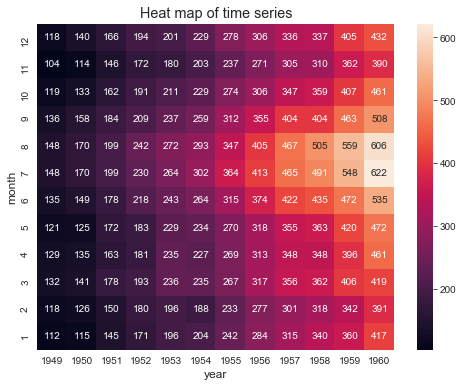

In [45]:
plt.figure(figsize=(8, 6))     
sns.heatmap(pivot_table, annot=True, fmt="d")
plt.ylim(0, 12) 
plt.title('Heat map of time series')
plt.show()

#### 5. Decomposition plot

Time series is made up of, and can be decomposed into, a number of components: Trend (T) , Seasonality (S) , Cyclical (C) and Noise (N) – these last two are sometimes combined and labelled as the Remainder (R) . It is helpful to think of the components as combining either additively or multiplicatively.

* An **additive** model suggests that the components are added together as follows:

$$y_t = T_t + S_t + C_t + N_t$$

* An **multiplicative** model suggests that the components are multiplied together as follows:

$$y_t = T_t \times S_t \times C_t \times N_t$$

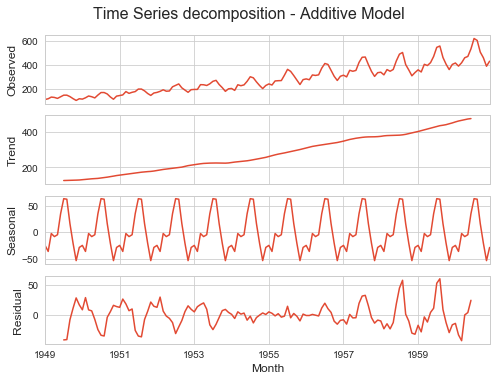

In [80]:
import statsmodels.api as sm
from pylab import rcParams
# additive model
rcParams['figure.figsize'] = 7, 5
ts = pd.Series(data=passenger_data['#Passengers'].values, 
               index=passenger_data.Month)
decomposition = sm.tsa.seasonal_decompose(ts, model='additive')
fig = decomposition.plot()
fig.suptitle('Time Series decomposition - Additive Model', fontsize=16, y=1.05)
plt.show()